In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

Load the Iris Dataset

In [2]:
# Load dataset
iris = load_iris()

X = iris.data
y_true = iris.target
feature_names = iris.feature_names

# Convert to DataFrame (for easier handling)
df = pd.DataFrame(X, columns=feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Feature Scaling (Important for K-Means)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Elbow Method (Choosing K)

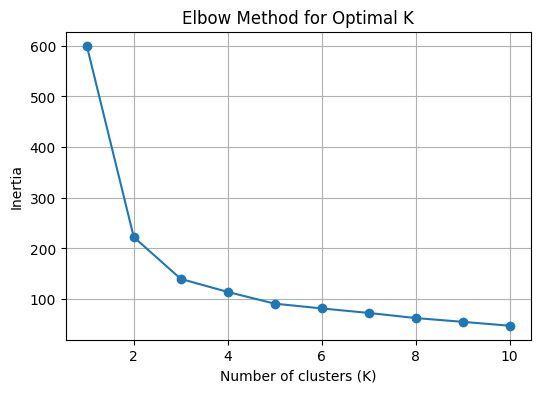

In [4]:
inertia = []

K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

Train K-Means (K = 3)

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df["Cluster"] = cluster_labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


2D Visualization (Using First Two Features)

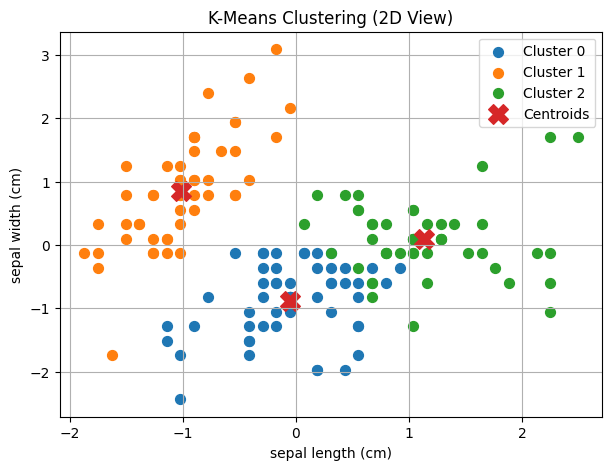

In [6]:
plt.figure(figsize=(7, 5))

for cluster in range(3):
    plt.scatter(
        X_scaled[cluster_labels == cluster, 0],
        X_scaled[cluster_labels == cluster, 1],
        label=f"Cluster {cluster}",
        s=50,
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker="X", label="Centroids")

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("K-Means Clustering (2D View)")
plt.legend()
plt.grid(True)
plt.show()

Comparing with True Labels

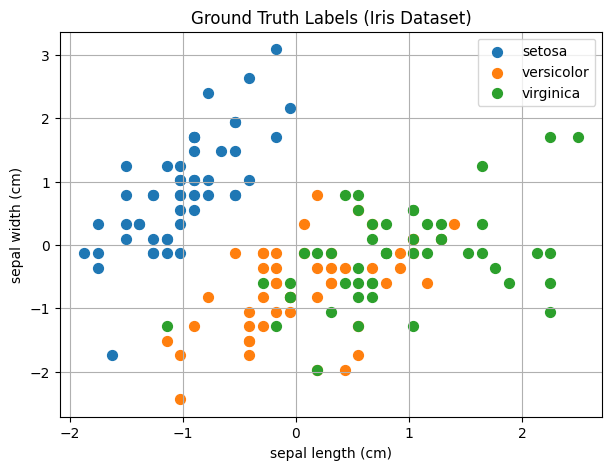

In [7]:
plt.figure(figsize=(7, 5))

for label in np.unique(y_true):
    plt.scatter(
        X_scaled[y_true == label, 0],
        X_scaled[y_true == label, 1],
        label=iris.target_names[label],
        s=50,
    )

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Ground Truth Labels (Iris Dataset)")
plt.legend()
plt.grid(True)
plt.show()

Cluster Distribution

In [9]:
df["Cluster"].value_counts()

Cluster
0    53
1    50
2    47
Name: count, dtype: int64